# 1.

![alt text](Imagens/fluxograma.png)

![alt text](Imagens/Enunciados/enunciado_1.png)

In [7]:
# Importar bibliotecas necessárias

import numpy as np
import matplotlib.pyplot as plt

# Calcula frequências e modos normais para 2 átomos com ligações periódicas
def calcular_2atomos(m1, m2, k):
    # Matriz de rigidez para o sistema de 2 átomos
    D = np.array([
        [-2*k/m1, 2*k/m1],
        [2*k/m2, -2*k/m2]
    ])
    
    # Calcula os autovalores e autovetores
    autovalores, autovetores = np.linalg.eig(D)
    autovalores = np.real(autovalores)
    autovalores[autovalores > 0] = 0.0
    freq = np.sqrt(-autovalores)
    idx = freq.argsort()

    # Ordena as frequências e autovetores
    return freq[idx], autovetores[:, idx]

Relação entre Massa m_2 e Frequências Normais (2 Átomos)


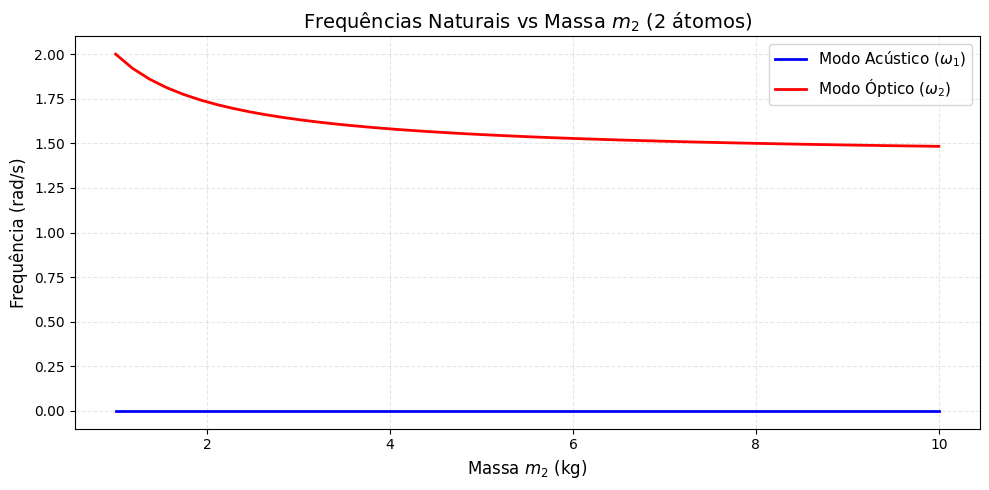

Modos Normais para Valores Específicos de m_2


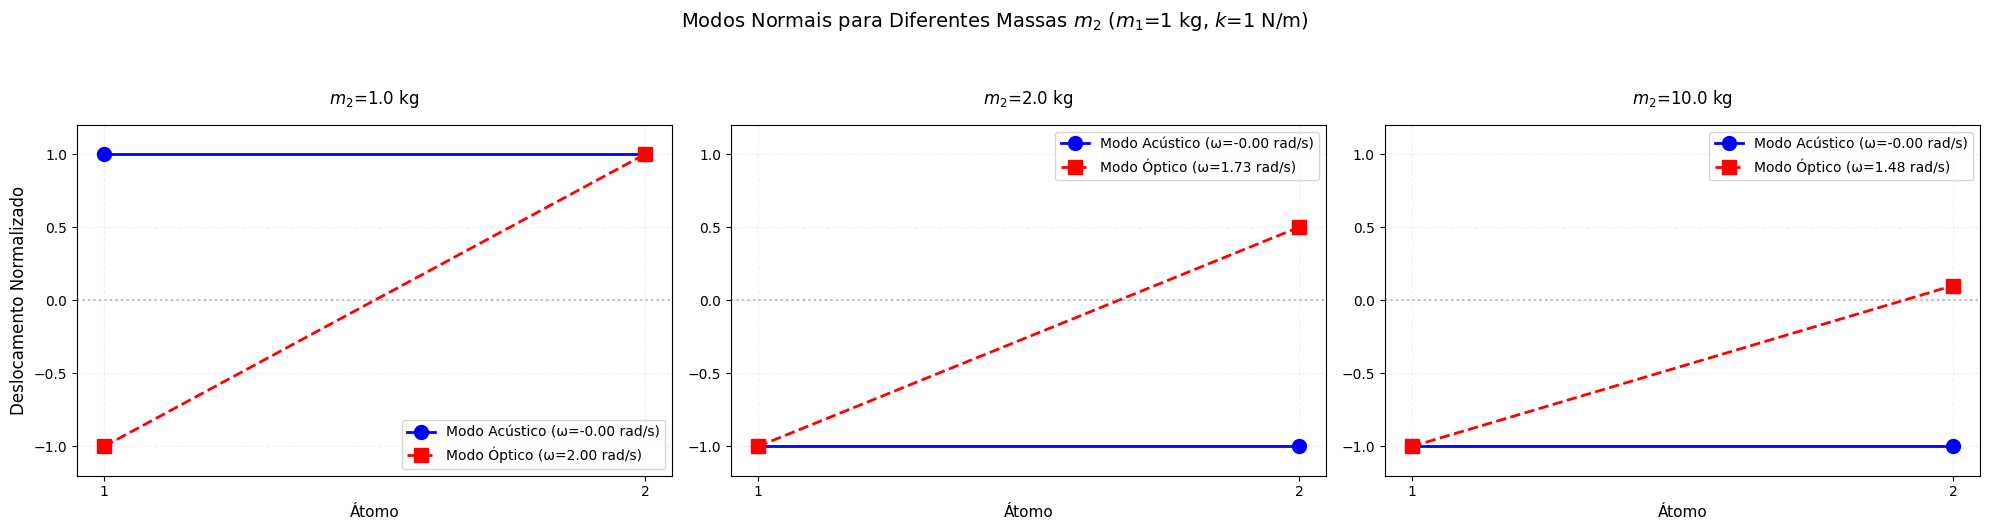

In [8]:

# Calcula frequências e modos normais para 2 átomos com ligações periódicas
def plotar_frequencias_vs_massa_2_atomos():
    m2_vals = np.linspace(1, 10, 50)
    frequencias = np.zeros((len(m2_vals), 2))

    # Calcula frequências para diferentes valores de m2
    for i, m2 in enumerate(m2_vals):
        freq, _ = calcular_2atomos(m1=1.0, m2=m2, k=1.0)
        frequencias[i] = freq

    # Plota as frequências naturais em função de m2
    plt.figure(figsize=(10, 5))
    plt.plot(m2_vals, frequencias[:, 0], 'b-', linewidth=2, label=r'Modo Acústico ($\omega_1$)')
    plt.plot(m2_vals, frequencias[:, 1], 'r-', linewidth=2, label=r'Modo Óptico ($\omega_2$)')
    plt.title(r'Frequências Naturais vs Massa $m_2$ (2 átomos)', fontsize=14)
    plt.xlabel(r'Massa $m_2$ (kg)', fontsize=12)
    plt.ylabel('Frequência (rad/s)', fontsize=12)
    plt.legend(fontsize=11)
    plt.grid(alpha=0.3, linestyle='--')
    plt.tight_layout()
    plt.show()

# Plota os modos normais para valores específicos de m2 
def plotar_modos_para_massas_especificas():
    # Valores fixos para m1, k e uma lista de m2
    m1 = 1.0  # kg
    k = 1.0   # N/m
    m2_vals = [1.0, 2.0, 10.0]  # Valores específicos para análise
    
    # Criar figura com 3 subplots em uma linha
    fig, axs = plt.subplots(1, 3, figsize=(20, 5))
    
    # Iterar sobre os valores de m2 e calcular os modos normais
    for idx, m2 in enumerate(m2_vals):
        freq, modos = calcular_2atomos(m1, m2, k)
        
        # Normalizar os modos
        modo1 = modos[:, 0]/np.max(np.abs(modos[:, 0]))
        modo2 = modos[:, 1]/np.max(np.abs(modos[:, 1]))
        
        # Plotar os modos com estilos distintos
        axs[idx].plot([1, 2], modo1, 'bo-', markersize=10, linewidth=2, 
                     label=f'Modo Acústico (ω={freq[0]:.2f} rad/s)')
        axs[idx].plot([1, 2], modo2, 'rs--', markersize=10, linewidth=2, 
                     label=f'Modo Óptico (ω={freq[1]:.2f} rad/s)')
        
        # Configurações do subplot
        axs[idx].set_title(f'$m_2$={m2} kg', fontsize=12, pad=15) 
        axs[idx].set_xlabel('Átomo', fontsize=11) 
        axs[idx].set_xticks([1, 2])
        axs[idx].set_ylim(-1.2, 1.2)
        axs[idx].axhline(0, color='gray', linestyle=':', alpha=0.5) 
        axs[idx].grid(alpha=0.2, linestyle='--')
        
        # Configurações do eixo y
        if idx == 0:
            axs[idx].set_ylabel('Deslocamento Normalizado', fontsize=12)
             
       
        # Posicionar a legenda
        axs[idx].legend(fontsize=10, loc='upper right')
    
    # Ajustar o layout para evitar sobreposição
    axs[0].legend(fontsize=10, loc='lower right')

    # Configurações gerais da figura
    plt.suptitle('Modos Normais para Diferentes Massas $m_2$ ($m_1$=1 kg, $k$=1 N/m)', 
                fontsize=14, y=1.05)
    plt.tight_layout()
    plt.show()

# Título pro terminal
print("="*60)
print("Relação entre Massa m_2 e Frequências Normais (2 Átomos)")
print("="*60)

# Gráfico da relação massa-frequência
plotar_frequencias_vs_massa_2_atomos()

# Título pro terminal
print("="*60)
print("Modos Normais para Valores Específicos de m_2")
print("="*60)

# Modos normais para valores específicos
plotar_modos_para_massas_especificas()

## Output dos gráficos:

![alt text](Imagens/Graficos/Graf1_1.png)

![alt text](Imagens/Graficos/Graf1_2.png)

# 2.

![alt text](Imagens/Enunciados/enunciado_2.png)

In [9]:
# Calcula frequências e modos normais para 3 átomos com ligações periódicas

def calcular_3atomos(m, k):

    m1, m2, m3 = m
    k12, k23, k31 = k
    
    D = np.array([
        [-(k12 + k31)/m1, k12/m1, k31/m1],
        [k12/m2, -(k12 + k23)/m2, k23/m2],
        [k31/m3, k23/m3, -(k23 + k31)/m3]
    ])
    
    autovalores, autovetores = np.linalg.eig(D)
    autovalores = np.real(autovalores)
    autovalores[autovalores > 0] = 0.0
    freq = np.sqrt(-autovalores)
    idx = freq.argsort()
    return freq[idx], autovetores[:, idx]


Relação entre Variação de Massas e Frequências Normais


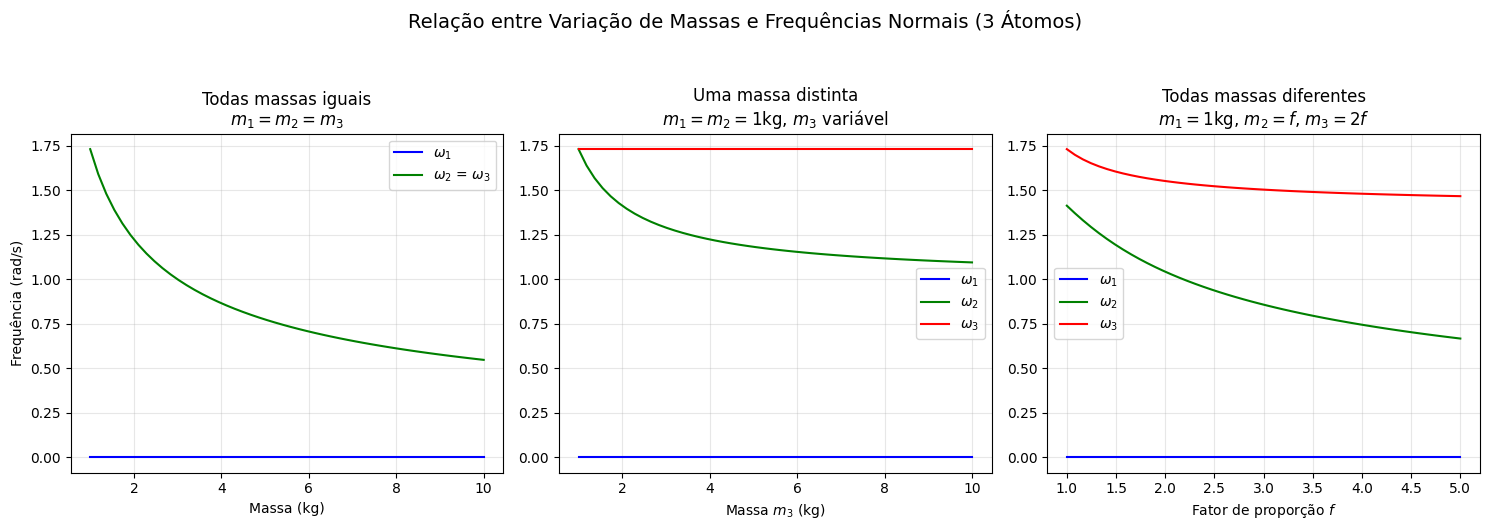

Modos Normais para Casos Exemplares


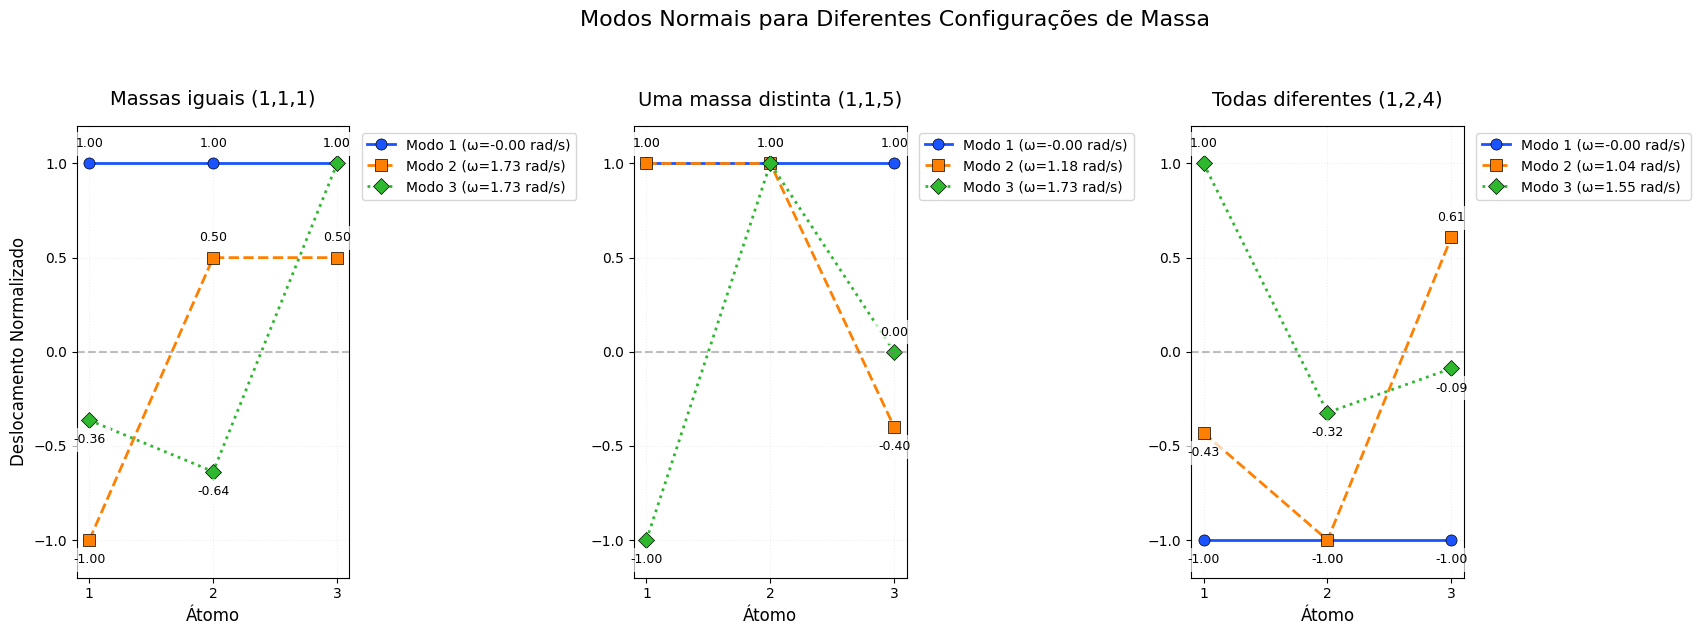

In [10]:
# Plota a relação entre variação de massas e frequências para 3 casos 

def plotar_relacao_massa_frequencia():
    plt.figure(figsize=(15, 5))
    
    # Caso 1: Todas massas iguais (variando a massa comum)
    ax1 = plt.subplot(1, 3, 1)
    m_vals = np.linspace(1, 10, 50)
    freq_iguais = np.zeros((len(m_vals), 3))
    
    # Calcula frequências para diferentes valores de massa comum
    for i, m in enumerate(m_vals):
        freq, _ = calcular_3atomos(m=[m, m, m], k=[1.0, 1.0, 1.0])
        freq_iguais[i] = freq
    
    # Plota as frequências naturais em função da massa comum
    ax1.plot(m_vals, freq_iguais[:, 0], 'b-', label=r'$\omega_1$')
    ax1.plot(m_vals, freq_iguais[:, 1], 'g-', label=r'$\omega_2$ = $\omega_3$')
    ax1.set_title('Todas massas iguais\n$m_1 = m_2 = m_3$', fontsize=12)
    ax1.set_xlabel('Massa (kg)', fontsize=10)
    ax1.set_ylabel('Frequência (rad/s)', fontsize=10)
    ax1.legend()
    ax1.grid(alpha=0.3)
    
    # Caso 2: Uma massa distinta (fixando m1=m2=1, variando m3)
    ax2 = plt.subplot(1, 3, 2)
    m3_vals = np.linspace(1, 10, 50)
    freq_uma_distinta = np.zeros((len(m3_vals), 3))
    
    # Calcula frequências para diferentes valores de m3
    for i, m3 in enumerate(m3_vals):
        freq, _ = calcular_3atomos(m=[1.0, 1.0, m3], k=[1.0, 1.0, 1.0])
        freq_uma_distinta[i] = freq
    
    # Plota as frequências naturais em função de m3
    ax2.plot(m3_vals, freq_uma_distinta[:, 0], 'b-', label=r'$\omega_1$')
    ax2.plot(m3_vals, freq_uma_distinta[:, 1], 'g-', label=r'$\omega_2$')
    ax2.plot(m3_vals, freq_uma_distinta[:, 2], 'r-', label=r'$\omega_3$')
    ax2.set_title('Uma massa distinta\n$m_1 = m_2 = 1$kg, $m_3$ variável', fontsize=12)
    ax2.set_xlabel('Massa $m_3$ (kg)', fontsize=10)
    ax2.legend()
    ax2.grid(alpha=0.3)
    
    # Caso 3: Todas massas diferentes (variando m2 e m3 proporcionalmente)
    ax3 = plt.subplot(1, 3, 3)
    fator_vals = np.linspace(1, 5, 50)
    freq_todas_diferentes = np.zeros((len(fator_vals), 3))
    
    # Calcula frequências para diferentes valores de fator
    for i, fator in enumerate(fator_vals):
        freq, _ = calcular_3atomos(m=[1.0, 1.0*fator, 2.0*fator], k=[1.0, 1.0, 1.0])
        freq_todas_diferentes[i] = freq
    
    # Plota as frequências naturais em função do fator de proporção
    ax3.plot(fator_vals, freq_todas_diferentes[:, 0], 'b-', label=r'$\omega_1$')
    ax3.plot(fator_vals, freq_todas_diferentes[:, 1], 'g-', label=r'$\omega_2$')
    ax3.plot(fator_vals, freq_todas_diferentes[:, 2], 'r-', label=r'$\omega_3$')
    ax3.set_title('Todas massas diferentes\n$m_1=1$kg, $m_2=f$, $m_3=2f$', fontsize=12)
    ax3.set_xlabel('Fator de proporção $f$', fontsize=10)
    ax3.legend()
    ax3.grid(alpha=0.3)
    
    # Título geral da figura
    plt.suptitle("Relação entre Variação de Massas e Frequências Normais (3 Átomos)", 
                fontsize=14, y=1.05)
    
    # Ajustar o layout para evitar sobreposição
    plt.tight_layout()
    plt.show()

# Plota modos normais para casos exemplares de cada configuração lado a lado
def plotar_modos_exemplares():
    """Plota modos normais para casos exemplares de cada configuração lado a lado."""
    # Configurações exemplares
    casos = [
        ([1.0, 1.0, 1.0], [1.0, 1.0, 1.0], "Massas iguais (1,1,1)"),
        ([1.0, 1.0, 5.0], [1.0, 1.0, 1.0], "Uma massa distinta (1,1,5)"),
        ([1.0, 2.0, 4.0], [1.0, 1.0, 1.0], "Todas diferentes (1,2,4)")
    ]
    
    # Criar figura com 3 subplots lado a lado
    fig, axs = plt.subplots(1, 3, figsize=(18, 6))
    
    # Cores e estilos distintos para cada modo
    cores = ['#1a53ff', '#ff8000', '#2eb82e']  # Azul forte, laranja, verde
    estilos = ['-', '--', ':']  # Sólido, tracejado, pontilhado
    marcadores = ['o', 's', 'D']  # Círculo, quadrado, diamante
    
    # Iterar sobre os casos e calcular os modos normais
    for idx, (massas, molas, titulo) in enumerate(casos):
        freq, modos = calcular_3atomos(m=massas, k=molas)
        
        # Plotar os 3 modos para cada configuração com estilos distintos
        for i in range(3):
            modo = modos[:, i] / np.max(np.abs(modos[:, i]))
            axs[idx].plot([1, 2, 3], modo, 
                         linestyle=estilos[i],
                         color=cores[i],
                         marker=marcadores[i],
                         markersize=8,
                         linewidth=2,
                         markeredgecolor='black',
                         markeredgewidth=0.5,
                         label=f'Modo {i+1} (ω={freq[i]:.2f} rad/s)')
        
        # Configurações do subplot
        axs[idx].set_title(titulo, fontsize=14, pad=15)
        axs[idx].set_xlabel('Átomo', fontsize=12)
        axs[idx].set_xticks([1, 2, 3])
        axs[idx].set_ylim(-1.2, 1.2)  # Aumentei o limite para caber a legenda
        
        # Linha de referência e grade
        axs[idx].axhline(0, color='gray', linestyle='--', alpha=0.5)
        axs[idx].grid(alpha=0.2, linestyle=':')
        
        # Adicionar valores nos pontos
        for i in range(3):
            modo = modos[:, i] / np.max(np.abs(modos[:, i]))
            for j in range(3):
                va = 'bottom' if modo[j] >= 0 else 'top'
                offset = 0.07 if modo[j] >= 0 else -0.07
                axs[idx].text(j+1, modo[j]+offset, f'{modo[j]:.2f}',
                            ha='center', va=va, fontsize=9,
                            bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))
        
        # Posicionar a legenda fora do gráfico quando necessário
        if idx == 2:  # Para o caso "Todas diferentes"
            axs[idx].legend(fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')
        else:
            axs[idx].legend(fontsize=10, loc='upper right')
        
        # Apenas o primeiro subplot tem o eixo y
        if idx == 0:
            axs[idx].set_ylabel('Deslocamento Normalizado', fontsize=12)
        else:
            axs[idx].set_ylabel('')
    
    # Ajustar o layout para evitar sobreposição 
    for idx in range(3):
        axs[idx].legend(fontsize=10, bbox_to_anchor=(1.02, 1), loc='upper left')

    plt.tight_layout(rect=[0, 0, 0.9, 1])  # Ajuste maior

    plt.suptitle("Modos Normais para Diferentes Configurações de Massa", 
                fontsize=16, y=1.05)
    plt.tight_layout(rect=[0, 0, 0.95, 1])  # Ajuste para caber a legenda
    plt.show()

# Título pro terminal
print("="*60)
print("Relação entre Variação de Massas e Frequências Normais")
print("="*60)

# Gráficos de relação massa-frequência
plotar_relacao_massa_frequencia()

# Título pro terminal
print("="*60)
print("Modos Normais para Casos Exemplares")
print("="*60)

# Plota modos normais para casos exemplares
plotar_modos_exemplares()

## Output dos Gráficos

![alt text](Imagens/Graficos/Graf2_1.png)

![alt text](Imagens/Graficos/Graf2_2.png)

# 3.

![alt text](Imagens/Enunciados/enunciado_3.png)

Relação entre Constantes de Mola e Frequências Normais


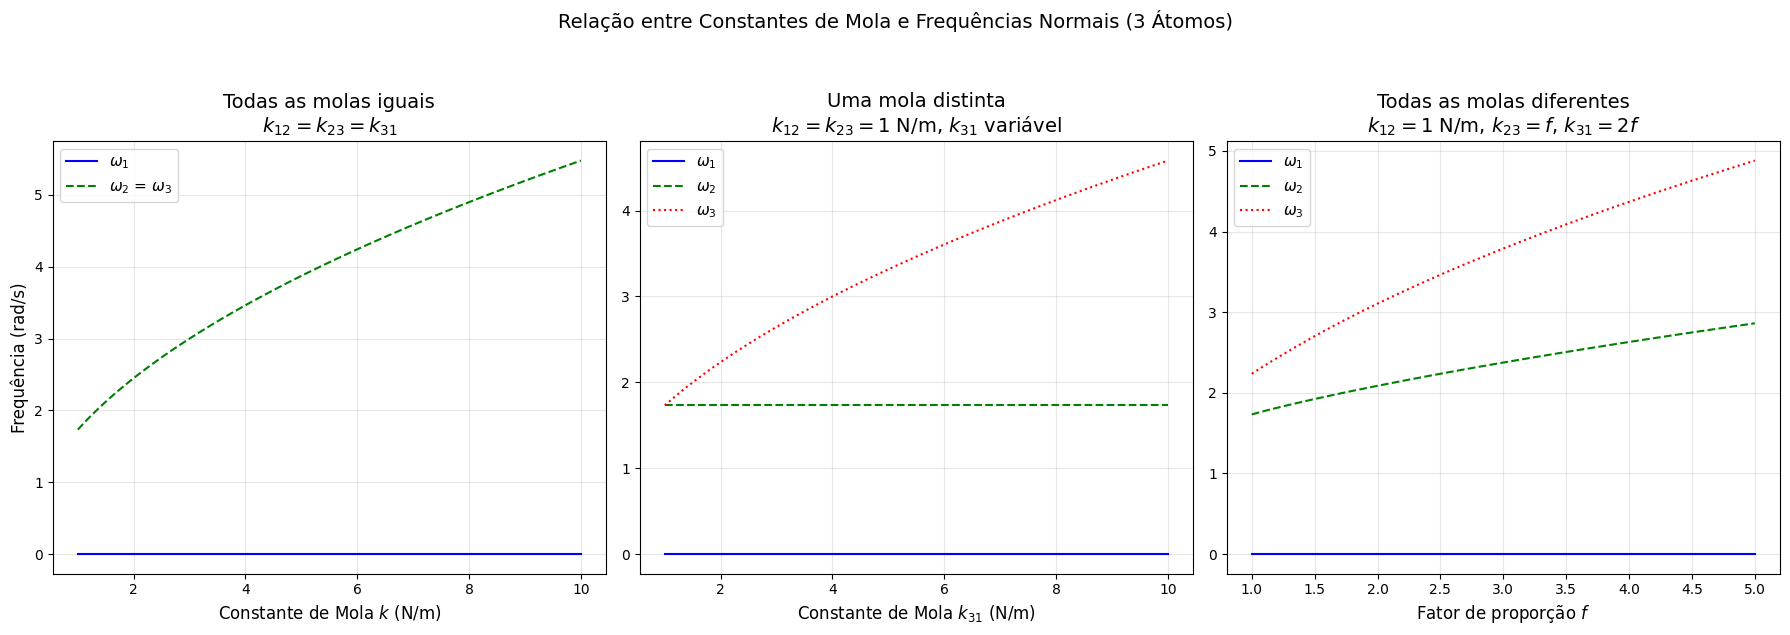

Modos Normais para Casos Exemplares


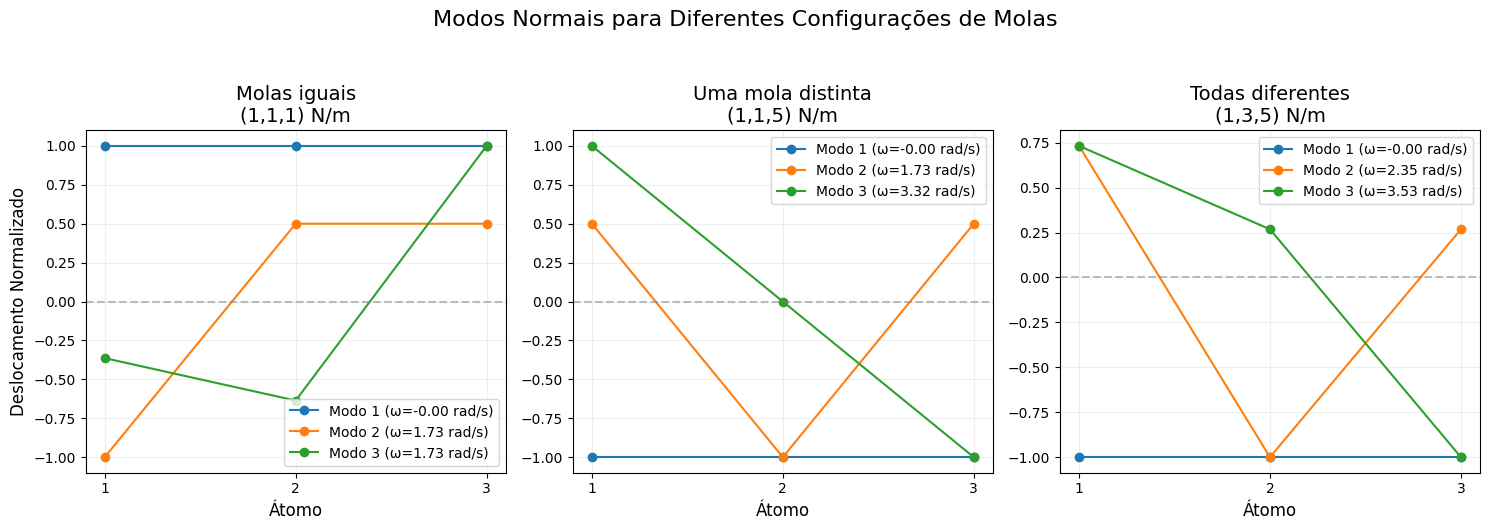

In [11]:
# Função para calcular frequências e modos normais para 3 átomos com ligações periódicas (já definida acima)
# "def calcular_3atomos(m, k):"

# Plota a relação entre constantes de mola e frequências para 3 casos
def plotar_relacao_mola_frequencia():

    # Cria uma figura com 3 subplots lado a lado
    plt.figure(figsize=(18, 6))
    massas = [1.0, 1.0, 1.0]  # Massas fixas iguais
    
    # 1. Todas as molas iguais (variando k comum)
    ax1 = plt.subplot(1, 3, 1)
    k_vals = np.linspace(1, 10, 50)
    freq_iguais = np.zeros((len(k_vals), 3))
    
    # Calcula frequências para diferentes valores de k
    for i, k in enumerate(k_vals):
        freq, _ = calcular_3atomos(m=massas, k=[k, k, k])
        freq_iguais[i] = freq
    
    # Plota as frequências naturais em função de k
    ax1.plot(k_vals, freq_iguais[:, 0], 'b-', label=r'$\omega_1$')
    ax1.plot(k_vals, freq_iguais[:, 1], 'g--', label=r'$\omega_2$ = $\omega_3$')
    ax1.set_title('Todas as molas iguais\n$k_{12} = k_{23} = k_{31}$', fontsize=14)
    ax1.set_xlabel('Constante de Mola $k$ (N/m)', fontsize=12)
    ax1.set_ylabel('Frequência (rad/s)', fontsize=12)
    ax1.legend(fontsize=11)
    ax1.grid(alpha=0.3)
    
    # 2. Uma mola distinta (fixando k12=k23=1, variando k31)
    ax2 = plt.subplot(1, 3, 2)
    k31_vals = np.linspace(1, 10, 50)
    freq_uma_distinta = np.zeros((len(k31_vals), 3))
    
    # Calcula frequências para diferentes valores de k31
    for i, k31 in enumerate(k31_vals):
        freq, _ = calcular_3atomos(m=massas, k=[1.0, 1.0, k31])
        freq_uma_distinta[i] = freq
    
    # Plota as frequências naturais em função de k31
    ax2.plot(k31_vals, freq_uma_distinta[:, 0], 'b-', label=r'$\omega_1$')
    ax2.plot(k31_vals, freq_uma_distinta[:, 1], 'g--', label=r'$\omega_2$')
    ax2.plot(k31_vals, freq_uma_distinta[:, 2], 'r:', label=r'$\omega_3$')
    ax2.set_title('Uma mola distinta\n$k_{12}=k_{23}=1$ N/m, $k_{31}$ variável', fontsize=14)
    ax2.set_xlabel('Constante de Mola $k_{31}$ (N/m)', fontsize=12)
    ax2.legend(fontsize=11)
    ax2.grid(alpha=0.3)
    
    # 3. Todas as molas diferentes (k12 fixo, k23 e k31 proporcionais)
    ax3 = plt.subplot(1, 3, 3)
    fator_vals = np.linspace(1, 5, 50)
    freq_todas_diferentes = np.zeros((len(fator_vals), 3))
    
    # Calcula frequências para diferentes valores de fator
    for i, fator in enumerate(fator_vals):
        freq, _ = calcular_3atomos(m=massas, k=[1.0, 1.0*fator, 2.0*fator])
        freq_todas_diferentes[i] = freq
    
    # Plota as frequências naturais em função do fator de proporção
    ax3.plot(fator_vals, freq_todas_diferentes[:, 0], 'b-', label=r'$\omega_1$')
    ax3.plot(fator_vals, freq_todas_diferentes[:, 1], 'g--', label=r'$\omega_2$')
    ax3.plot(fator_vals, freq_todas_diferentes[:, 2], 'r:', label=r'$\omega_3$')
    ax3.set_title('Todas as molas diferentes\n$k_{12}=1$ N/m, $k_{23}=f$, $k_{31}=2f$', fontsize=14)
    ax3.set_xlabel('Fator de proporção $f$', fontsize=12)
    ax3.legend(fontsize=11)
    ax3.grid(alpha=0.3)
    
    # Título geral da figura
    plt.suptitle("Relação entre Constantes de Mola e Frequências Normais (3 Átomos)", 
                fontsize=14, y=1.05)

    # Ajustar o layout para evitar sobreposição
    plt.tight_layout()
    plt.show()

# Plota modos normais para casos exemplares de cada configuração lado a lado
def plotar_modos_exemplares():
    """Plota modos normais para casos exemplares lado a lado."""
    casos = [
        ([1.0, 1.0, 1.0], [1.0, 1.0, 1.0], "Molas iguais\n(1,1,1) N/m"),
        ([1.0, 1.0, 1.0], [1.0, 1.0, 5.0], "Uma mola distinta\n(1,1,5) N/m"),
        ([1.0, 1.0, 1.0], [1.0, 3.0, 5.0], "Todas diferentes\n(1,3,5) N/m")
    ]
    
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    
    for idx, (massas, molas, titulo) in enumerate(casos):
        freq, modos = calcular_3atomos(m=massas, k=molas)
        
        for i in range(3):
            modo = modos[:, i] / np.max(np.abs(modos[:, i]))
            axs[idx].plot([1, 2, 3], modo, 'o-', 
                         label=f'Modo {i+1} (ω={freq[i]:.2f} rad/s)')
        
        axs[idx].set_title(titulo, fontsize=14)
        axs[idx].set_xlabel('Átomo', fontsize=12)
        axs[idx].set_xticks([1, 2, 3])
        axs[idx].axhline(0, color='gray', linestyle='--', alpha=0.5)
        axs[idx].grid(alpha=0.2)
        
        if idx == 0:
            axs[idx].set_ylabel('Deslocamento Normalizado', fontsize=12)
        
        axs[idx].legend(fontsize=10)

    # Ajustar o layout para evitar sobreposição das legendas
    plt.suptitle("Modos Normais para Diferentes Configurações de Molas", fontsize=16, y=1.05)
    plt.tight_layout()
    plt.show()

# Título pro terminal
print("="*60)
print("Relação entre Constantes de Mola e Frequências Normais")
print("="*60)

# 1. Gráficos de relação mola-frequência
plotar_relacao_mola_frequencia()

# Título pro terminal
print("="*60)
print("Modos Normais para Casos Exemplares")
print("="*60)

# 2. Plota modos normais para casos exemplares
plotar_modos_exemplares()

## Output dos Gráficos

![alt text](Imagens/Graficos/Graf3_1.png)

![alt text](Imagens/Graficos/Graf3_2.png)

# Relatório

![alt text](Imagens/Enunciados/enunciado_4.png)

**A comparação entre o caso de 2 e 3 átomos em termos de comportamento vibracional**

Uma análise comparativa entre os sistemas de 2 e 3 átomos revela diferenças fundamentais no comportamento vibracional da molécula, enquanto o sistema de 2 átomos apresenta apenas dois modos distintos (um acústico e outro óptico), o sistema de 3 átomos exibe maior complexidade com três modos vibracionais. Isso ocorre porque o número de modos normais sempre iguala o número de graus de liberdade do sistema. Dessa forma, no caso de 3 átomos, surge um modo adicional que pode apresentar comportamentos intermediários ou padrões mais complexos de vibração.


**A influência da simetria e variação de massas nas frequências**

Quando as massas são iguais e as constantes de mola idênticas, observamos degenerescência de frequências nos sistemas simétricos no caso de 2 átomos, isso ocorre quando m1 = m2, no sistema de 3 átomos aparecem dois modos com a mesma frequência. Agora quando há a quebra de simetria, seja pela variação de massas ou constantes de mola, essa degenerescência é removida, e se produz um espectro de frequências mais amplas.

**A mudança nas formas dos modos normais**

As formas dos modos normais sofrem alterações significativas conforme a distribuição de massas. Nos sistemas simétricos, os deslocamentos são mais uniformemente distribuídos entre os átomos. Porém, quando introduzimos assimetria, os modos tendem a se concentrar nos elementos mais leves, com os átomos pesados apresentando menor amplitude de vibração. Particularmente no sistema de 3 átomos, a quebra de simetria pode gerar modos complexos onde dois átomos vibram em fase enquanto o terceiro vibra em oposição, padrão que não existe no caso mais simples de 2 átomos. Dessa forma, fica evidente que o aumento no número de partículas amplia significativamente a riqueza de comportamentos vibracionais possíveis para esses sistemas.
